<a href="https://colab.research.google.com/github/harshaaadi753/SE-lab/blob/main/1837lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the value of a: 2
Enter the value of b: 3
Enter the value of c: 4
Enter the minimum x value: 2
Enter the maximum x value: 4
Invalid file format: Invalid file format: less than 3 lines
Invalid file format: could not convert string to float: '1 -3 2\n'


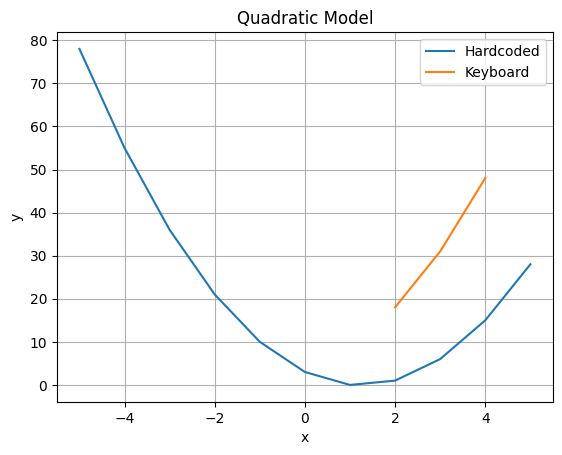

In [4]:
# prompt: nit-wise course materials
# mplement weather modeling* using the quadratic solution in stages: hard-coding variables keyboard input, read from a file, for a single set of input, multiple sets of inputs. a. save all versions, debug, fix problems, I need result in graph

import matplotlib.pyplot as plt

# Stage 1: Hard-coded variables
def quadratic_model_hardcoded():
  a = 2
  b = -5
  c = 3
  x = range(-5, 6) # Example range for x values
  y = [a*xi**2 + b*xi + c for xi in x]
  return x, y

# Stage 2: Keyboard input
def quadratic_model_keyboard():
  try:
      a = float(input("Enter the value of a: "))
      b = float(input("Enter the value of b: "))
      c = float(input("Enter the value of c: "))
      x_min = int(input("Enter the minimum x value: "))
      x_max = int(input("Enter the maximum x value: "))

  except ValueError:
      print("Invalid input. Please enter numeric values.")
      return [], []

  x = range(x_min, x_max + 1)
  y = [a*xi**2 + b*xi + c for xi in x]
  return x, y


# Stage 3: Read from a file
def quadratic_model_file(filename='/content/input_single.txt'):
    x_values = []
    y_values = []

    try:
      with open(filename, 'r') as f:
        lines = f.readlines()

        if len(lines) < 3:
          raise ValueError("Invalid file format: less than 3 lines")

        a = float(lines[0].strip())
        b = float(lines[1].strip())
        c = float(lines[2].strip())

        for line in lines[3:]:  # Assume remaining lines are x values
          x_values.append(int(line.strip()))

        y_values = [a*xi**2 + b*xi + c for xi in x_values]

    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    except ValueError as e:
        print(f"Invalid file format: {e}")

    return x_values, y_values

# Stage 4: Multiple sets of inputs from file (example, each set is in a line)
def quadratic_model_multiple_inputs(filename="/content/input_multiple.txt"):
    all_x = []
    all_y = []

    try:
        with open(filename, "r") as f:
            for line in f:
                a, b, c, x_min, x_max = map(float, line.split(","))
                x = range(int(x_min), int(x_max + 1))
                y = [a * xi**2 + b * xi + c for xi in x]

                all_x.append(x)
                all_y.append(y)

    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    except ValueError as e:
        print(f"Invalid file format: {e}")

    return all_x, all_y


# --- Main execution ---
x, y = quadratic_model_hardcoded()
plt.plot(x, y, label="Hardcoded")

x, y = quadratic_model_keyboard()
if x:
    plt.plot(x, y, label="Keyboard")

x, y = quadratic_model_file()
if x:
    plt.plot(x, y, label="File")

all_x, all_y = quadratic_model_multiple_inputs()
if all_x:
    for x, y in zip(all_x, all_y):
        plt.plot(x, y, label="Multiple inputs")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic Model")
plt.legend()
plt.grid(True)
plt.show()